In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import numpy as np
from numpy.random import default_rng
from scipy.optimize import minimize
from scipy.optimize import brute

In [2]:
data2013 = pd.read_csv('2013_Events.csv')
data2012 = pd.read_csv('2012_Events.csv')
data2011 = pd.read_csv('2011_Events.csv')
data20092010 = pd.read_csv('2009_2010_Events.csv')

In [3]:
data20092010.head()

,ID,Event date,Day,Action,Actor,Actor specified,Target,Target specified,Event,Oblast,...,Propdamag,#State,#State inj,#State killed,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,CK 1,21-Oct-2009,Wed,vandalism,NGO,"public organization ""People's Salvation Army"" ...",politician,candidates running for presidential elections,"Members of the public organization ""People's S...",Cherkasy,...,Y,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,CK 10,28-Nov-2009,Sat,arrest,state forces,police,NGO,Smila Community of political prisoners and rep...,"Police arrested dressed as ""cossacks"" activist...",Cherkasy,...,N,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,CK 100,17-Dec-2010,Fri,sabotage,unknown,NaN,state enterprise,Ukrainian Railways,As a protest against future closure of the two...,Cherkasy,...,Y,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,CK 101,28-Dec-2010,Tue,symbolic,"NGO, party","NGO ""Freedom"", UNP",government,"President of Ukraine Victor Yanukovych, Cabine...",In a symbolic way protesters demanded to stop ...,Cherkasy,...,N,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,CK 11,30-Nov-2009,Mon,rally,artists,artists of Cherkasy,"government, local authorities",NaN,Artists of Cherkasy gathered on the Ploshcha S...,Cherkasy,...,N,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data2013 = data2013[['Event start date', 'Number of protesters']]
data2012 = data2012[['Event start date', 'Number of protesters']]
data2011 = data2011[['Event start date', 'Number of protesters']]
data20092010 = data20092010[['Event date', '# protester']]
data20092010.columns = ['Event start date', 'Number of protesters']


In [5]:
data20092010.tail()

,Event start date,Number of protesters
4703,7-Nov-2010,101
4704,7-Nov-2010,101
4705,7-Nov-2010,NaN
4706,30-Oct-2009,NaN
4707,2-Nov-2009,NaN


In [6]:
data = pd.concat([data2013, data2012, data2011, data20092010])

In [7]:
data.tail()

,Event start date,Number of protesters
4703,7-Nov-2010,101
4704,7-Nov-2010,101
4705,7-Nov-2010,NaN
4706,30-Oct-2009,NaN
4707,2-Nov-2009,NaN


In [8]:
data['Event start date'] = pd.to_datetime(data['Event start date'])


In [9]:
data = data.sort_values(by = 'Event start date')

In [10]:
data.head()

,Event start date,Number of protesters
886,2009-10-01,NaN
4258,2009-10-01,10
483,2009-10-01,NaN
1194,2009-10-01,3
4057,2009-10-01,19


In [11]:
data['Number of events'] = 0
data['Number of protesters'] = pd.to_numeric(data['Number of protesters'], errors='coerce')

In [12]:
data_grouped = data.groupby(data['Event start date']).aggregate({'Number of events': 'size', 'Number of protesters': 'sum'})

In [13]:
data_grouped.head()

,Number of events,Number of protesters
Event start date,,
2009-10-01,13,48.0
2009-10-02,9,154.0
2009-10-03,3,14.0
2009-10-04,3,14.0
2009-10-05,3,14.0


<AxesSubplot:xlabel='Event start date'>

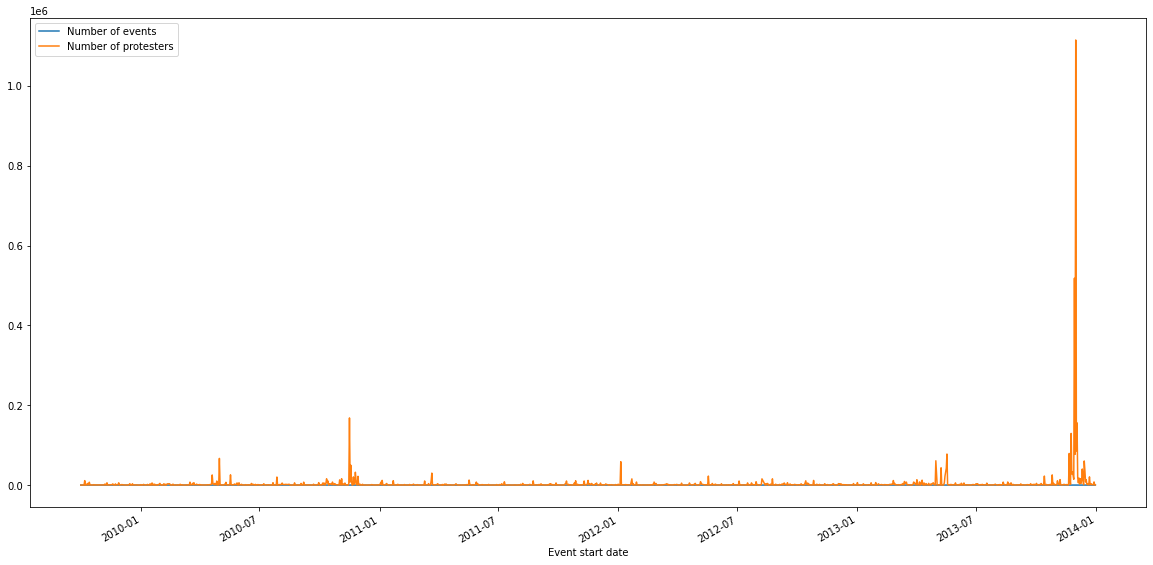

In [14]:
data_grouped.plot(figsize=(20,10))

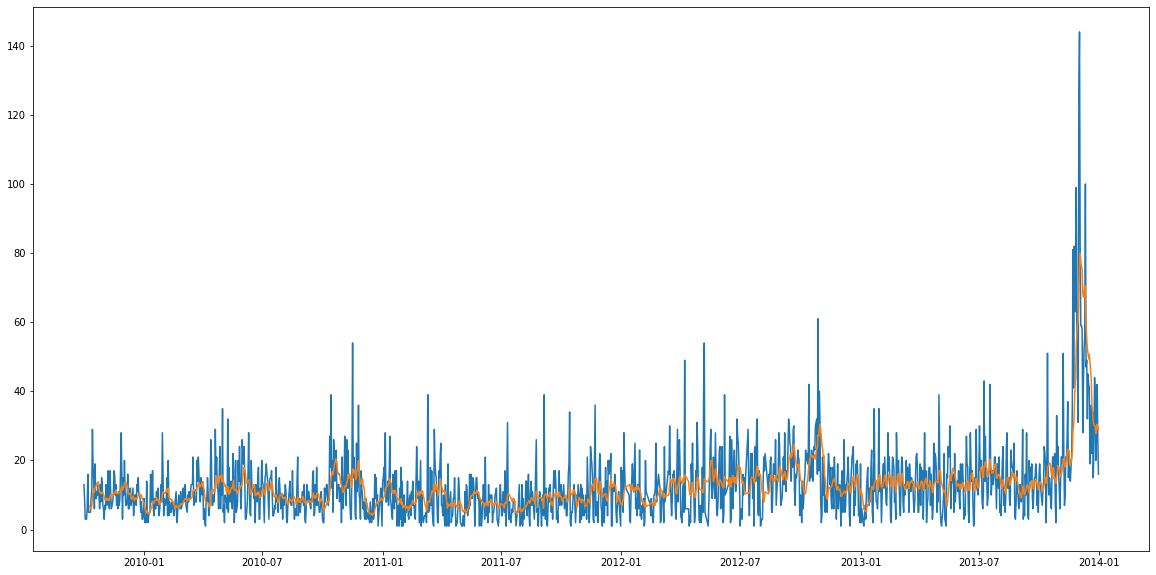

In [15]:
plt.figure(figsize=(20,10))
plt.plot(data_grouped['Number of events'])
plt.plot(data_grouped['Number of events'].rolling(10).mean())
# plt.plot(N0)

In [16]:
Nsec = 0.025
Texcite = 14

# Plot background guassian weighted average w/ following parameters

sigma = 180
deltaT = 30

N0 = data_grouped['Number of events'].rolling(window=deltaT, win_type="gaussian", center=True).mean(std=sigma)

# N0 is Null for the first and last deltaT/2 values

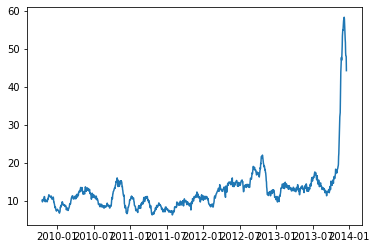

In [17]:
plt.plot(N0)

In [18]:
rng = default_rng()
png = rng.poisson(10)
print(png)

10


In [19]:
print(N0.shape)
print(data_grouped.shape)
data_grouped['N0'] = N0

(1494,)
(1494, 2)


In [20]:
data_grouped.head()

,Number of events,Number of protesters,N0
Event start date,,,
2009-10-01,13,48.0,NaN
2009-10-02,9,154.0,NaN
2009-10-03,3,14.0,NaN
2009-10-04,3,14.0,NaN
2009-10-05,3,14.0,NaN


In [21]:
data_grouped.iloc[15]


Number of events         14.00000
Number of protesters    123.00000
N0                       10.10133
Name: 2009-10-16 00:00:00, dtype: float64

In [22]:
print(data_grouped.dtypes)
print(data_grouped.index.dtype)

Number of events          int64
Number of protesters    float64
N0                      float64
dtype: object
datetime64[ns]


In [23]:
data_grouped['simulated'] = 0
data_grouped.reset_index(inplace=True)
data_grouped['Event start date'] = pd.to_numeric(pd.to_datetime(data_grouped['Event start date']))
data_grouped.head()

,Event start date,Number of events,Number of protesters,N0,simulated
0,1254355200000000000,13,48.0,NaN,0
1,1254441600000000000,9,154.0,NaN,0
2,1254528000000000000,3,14.0,NaN,0
3,1254614400000000000,3,14.0,NaN,0
4,1254700800000000000,3,14.0,NaN,0


In [24]:
type(data_grouped['Event start date'][0])

numpy.int64

In [25]:
#remove first and last 15 entries where N0 is nan

data_grouped = data_grouped[15:-14]
data_grouped.head()


,Event start date,Number of events,Number of protesters,N0,simulated
15,1255651200000000000,14,123.0,10.101330,0
16,1255737600000000000,6,204.0,9.868893,0
17,1255824000000000000,19,313.0,9.669648,0
18,1255910400000000000,9,256.0,9.802834,0
19,1255996800000000000,9,206.0,9.902609,0


In [26]:
data_grouped['simulated'][0] = 1
def simulate(x):
    arr = x[-1]
    d = (-x[:,0]/86400 + arr[0]/86400)/1000000000
    psum = x[:,3] * (np.exp((-(d-1))/Texcite) - np.exp(-d/Texcite))
    arr[4] = np.random.poisson(arr[3] + Nsec*psum.sum(), 1)[0]
    return arr


/Users/lucaswebb/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/lucaswebb/.pyenv/versions/3.7.7/lib/python3.7/site-packages/pandas/core/indexing.py:1706: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer_missing(indexer, value)


In [27]:
# requires developmental version 1.3 of pandas

simulated_data = data_grouped.expanding(method="table").apply(simulate, raw=True, engine="numba")


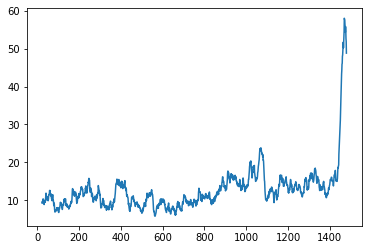

In [28]:
simulated_data['Event start date'] = pd.to_datetime(simulated_data['Event start date'])
plt.plot(simulated_data['simulated'].rolling(10).mean())

In [29]:
simulated_data.head()

,Event start date,Number of events,Number of protesters,N0,simulated
15,2009-10-16,14.0,123.0,10.101330,3.0
16,2009-10-17,6.0,204.0,9.868893,12.0
17,2009-10-18,19.0,313.0,9.669648,8.0
18,2009-10-19,9.0,256.0,9.802834,11.0
19,2009-10-20,9.0,206.0,9.902609,3.0


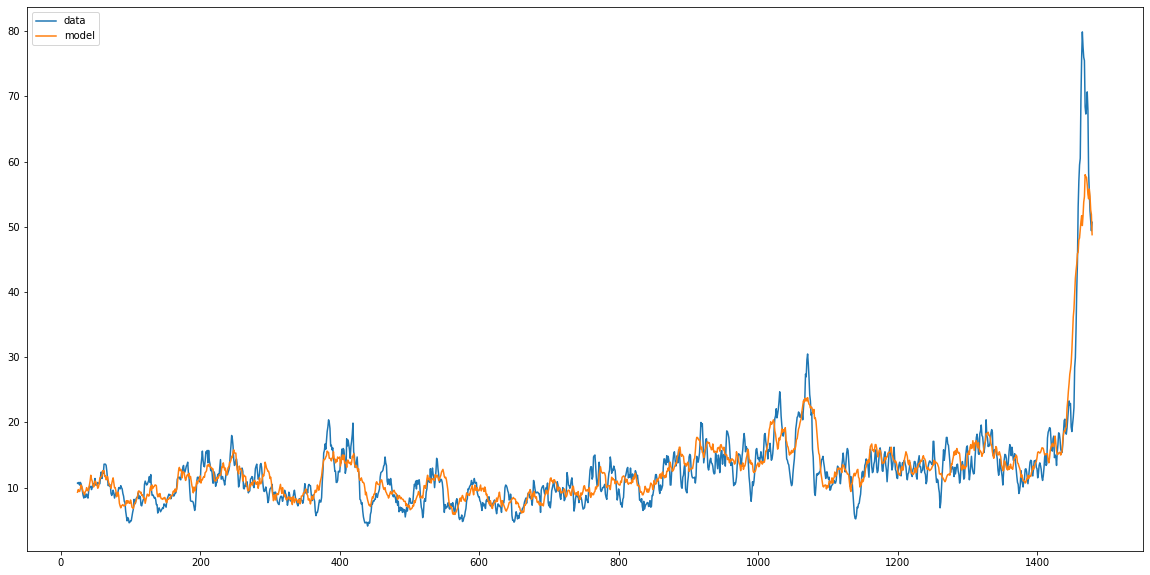

In [30]:
plt.figure(figsize=(20,10))
plt.plot(simulated_data['Number of events'].rolling(10).mean(), label='data')
plt.plot(simulated_data['simulated'].rolling(10).mean(), label='model')
plt.legend()

In [31]:
def computeLoss(model, actual):
    return -(model - actual * np.log(model)).sum()

In [32]:
computeLoss(simulated_data['simulated'], simulated_data['Number of events'])

29546.13060867952

In [33]:
computeLoss(simulated_data['N0'], simulated_data['Number of events'])

30355.099557378755

In [34]:
def MSE(model, actual):
    return np.power(actual - model.sum(), 2).sum() / len(actual)

In [35]:
print(MSE(simulated_data['simulated'], simulated_data['Number of events']))
print(MSE(simulated_data['N0'], simulated_data['Number of events']))


354018525.50375426
338007283.66306436


In [36]:
def simulate(x, x1, x2):
    arr = x[-1]
    d = (-x[:,0]/86400 + arr[0]/86400)/1000000000
    psum = x[:,3] * (np.exp((-(d-1))/x2) - np.exp(-d/x2))
    arr[4] = np.random.poisson(arr[3] + x1*psum.sum(), 1)[0]
    return arr

#x1: Nsec, x2:Texcite
def funcToMinimize(x):
    x1 = x[0]
    x2 = int(x[1])
    data = data_grouped[x2+1:-x2]
    data['simulated'][0] = 1
    data = data_grouped.expanding(method="table").apply(simulate, args=(x1, x2), raw=True, engine="numba")
    return computeLoss(data['simulated'], data['Number of events'])

In [78]:
funcToMinimize([20, 30])

/Users/lucaswebb/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/lucaswebb/.pyenv/versions/3.7.7/lib/python3.7/site-packages/pandas/core/indexing.py:1706: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer_missing(indexer, value)


29777.941854241344

In [38]:
x0 = [0.025, 14]
res = minimize(funcToMinimize, x0)
res.x

/Users/lucaswebb/.pyenv/versions/3.7.7/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/lucaswebb/.pyenv/versions/3.7.7/lib/python3.7/site-packages/pandas/core/indexing.py:1706: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer_missing(indexer, value)
/Users/lucaswebb/.pyenv/versions/3.7.7/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


OverflowError: cannot convert float infinity to integer

In [ ]:
x0 = [0.025, 14]
# res = brute(funcToMinimize, (slice(0, 1, 0.1), slice(0, 60, 1)), full_output=True)
# res

In [ ]:
res

In [ ]:
funcToMinimize([0.00025, 1])